In [1]:
from Model import *

In [2]:
a = results_df[ (results_df.iteration == 0) & (results_df.w == params["w"][9]) & (results_df.Step == 5)]
plt.hist(a.Opinion)

NameError: name 'results_df' is not defined

Let's find time to convergence. Defined as the 'Step' when convergence is reached

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  1.97s/it]


Text(0, 0.5, 'Time to consenus')

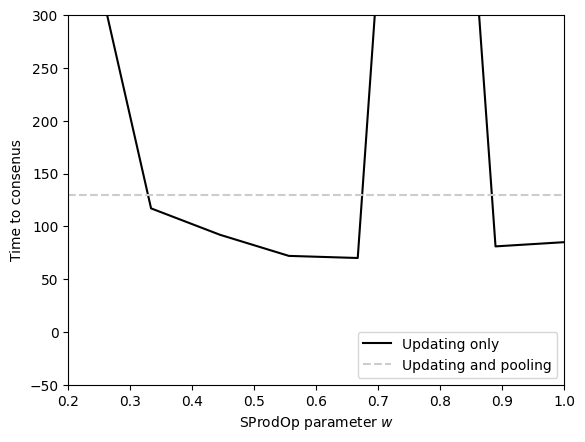

In [3]:
params = {"K": 100, "n": 3, "w": np.linspace(0,1,10), "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : False}

iterations = 1

results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=iterations,max_steps=500)

results_df = pd.DataFrame(results)
admired_cols = ['Step', 'Consensus', 'w', 'iteration']
results_df = results_df.drop(columns = [col for col in results_df.columns if col not in admired_cols])


nested_data = []
for w in params["w"]:
    data = []
    results_w = results_df[results_df.w == w]
    for it in range(iterations):
        results_it = results_w[(results_w.iteration == it) & (results_w.Consensus >= 0.9)]
        if len(results_it) > 0:
            consensus_time = results_it.Step.values[0]
            data.append(consensus_time)
        else:
            consensus_time = 1000
        data.append(consensus_time)

    nested_data.append(np.mean(np.array(data), axis = 0))
        
plt.plot(params["w"], nested_data, color = 'black', label = "Updating only")
plt.axhline(y = 130, color = '0.8', linestyle = 'dashed', label = "Updating and pooling")
plt.xlim([0.2,1])
plt.ylim([-50,300])
plt.legend(loc = 4)
plt.xlabel("SProdOp parameter $w$")
plt.ylabel("Time to consenus")

plt.savefig("Figures/Varied_av_op_plots/.pdf")

100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.25it/s]


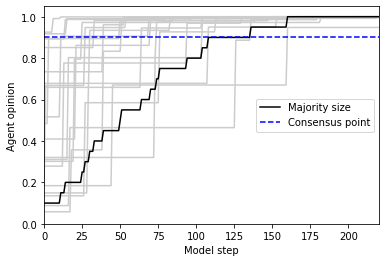

In [23]:
# This plot can be the explanatory plot. We can have the agent opinions plotted as light gray lines and the consensus line as a black line
# that is labelled with M >= ...

params = {"K": 20, "n": 3, "w": 1, "alpha": 0.1, "epsilon" : 0.02, "pooling" : False, "uniform" : False}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=1,max_steps=300)
results_df = pd.DataFrame(results)
admired_cols = ['Step', 'Opinion']

plt.figure()
for agentID in range(params["K"]):
    agent = results_df[results_df.AgentID == agentID]
    plt.plot(agent.Step, agent.Opinion, '0.8')
    
plt.plot(results_df.Step, results_df.Consensus, color = 'black', label = 'Majority size')
plt.xlabel("Model step")
plt.ylabel("Agent opinion")
plt.axhline(y = 0.9, color = 'b', linestyle = 'dashed', label = 'Consensus point')
plt.legend(loc = 5)
plt.ylim(0,1.05)
plt.xlim(0, 220)

# plt.savefig("Figures/demonstration_without_pooling.pdf")

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.59it/s]


Text(0, 0.5, 'Average opinion')

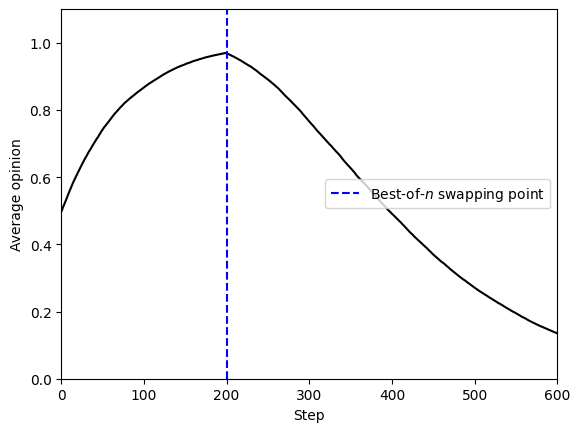

In [3]:
# Plotting average opinion of agents against time step, emulating the simulation run in Figure 2 on Chanelle's opinion pooling
# paper using the same parameters
params = {"K": 100, "n": 3, "w": 0.5, "alpha": 0.1, "epsilon" : 0.02, "pooling" : False, "uniform" : False, "dynamics" : "switching"}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=100,max_steps=600)
results_df = pd.DataFrame(results)

plt.figure()
data = []
for it in range(100):
    results_it = results_df[results_df.iteration == it]
#     results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#     results_it.drop_duplicates()
    data.append(results_it.Average_opinion)
    
plt.plot(results_it.Step, np.mean(np.array(data), axis=0), color = 'black')
# plt.title("Average opinion against step. K = 100, n = 3, alpha = 0.1, epsilon = 0.02, its = 30")
# plt.axhline(y = 0.9, color = 'gray', linestyle = 'dashed', label = 'H1 Consensus point')
# plt.axhline(y = 0.1, color = 'green', linestyle = 'dashed', label = 'H2 Consensus point')
plt.axvline(x = 200, color = 'blue', linestyle = 'dashed', label = 'Best-of-$n$ swapping point')
plt.legend(loc = 5)
plt.xlim(0,600)
plt.ylim(0,1.1)
plt.xlabel("Step")
plt.ylabel("Average opinion")
# plt.savefig("Figures/switching_without_pooling2.pdf")

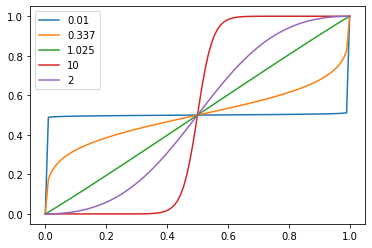

In [57]:
# Recreating figure 3 from opinion pooling paper to make sure that the pooling mechanism is implemented properly.

for w in (0.01, 0.337, 1.025, 10):
    data = []
    for x in np.linspace(0,1,100):
        c_x = x**w / (x**w + (1-x)**w)
        data.append(c_x)
    plt.plot(np.linspace(0,1,100),data, label = w)
    plt.legend()
    
plt.savefig('Figures/SProdOP_varying_w.pdf')

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.52it/s]


(0.0, 1.1)

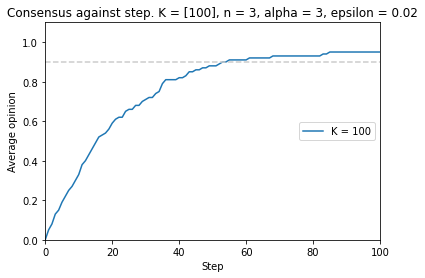

In [7]:
params = {"K": [100], "n": 3, "w": 1, "alpha": 0.1, "epsilon" : 0.02, "pooling" : True, "uniform" : True}
results = mesa.batch_run(Model,parameters=params,number_processes=1,data_collection_period=1,display_progress=True,
    iterations=10,max_steps=100)
results_df = pd.DataFrame(results)

plt.figure()
admired_cols = ['Step', 'Consensus']

for k in params["K"]:
    results_k = results_df[results_df.K == k]
    data = []
    for it in range(1):
        results_it = results_k[results_k.iteration == it]
        results_it = results_it.drop(columns = [col for col in results_it.columns if col not in admired_cols])
#         results_it.drop_duplicates()
        data.append(results_it.Consensus)

    plt.plot(results_it.Step, np.mean(np.array(data), axis=0), label = "K = " + str(k))
    plt.legend(loc = 5)
    
plt.title("Consensus against step. K = "+str(params["K"])+", n = "+str(params["n"])+", alpha = "+str(params["n"])+", epsilon = "+str(params["epsilon"]))
plt.xlabel("Step")
plt.axhline(y = 0.9, color = '0.8', linestyle = 'dashed')
plt.ylabel("Average opinion")
plt.xlim([0,100])
plt.ylim([0,1.1])

# plt.savefig('Figures/average_opinion_varying_K_uniform.pdf')

 10%|████████▎                                                                          | 1/10 [00:02<00:20,  2.32s/it]D:\Users\Josh\github\Dynamic-Environments-in-Best-of-N\Model.py:104: RuntimeWarning: invalid value encountered in scalar divide
  c_x = ((np.prod(pooled_opinions))**w)  /  ((np.prod(pooled_opinions)**w)  +
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.11s/it]


100


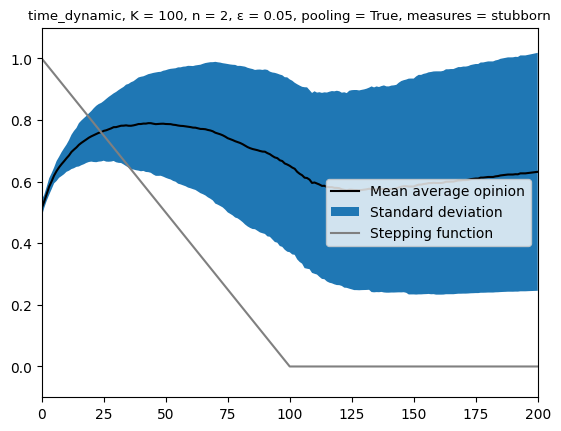

In [2]:
params = {"K": 100, "n": 2, "w": 2, "alpha": 0.2, "epsilon" : 0.05,
          "pooling" : True, "uniform" : False, "dynamics" : "time_dynamic",
          "measures" : "stubborn", "s_proportion" : 0}

iterations = 10
max_steps = 200

results = mesa.batch_run(Model,parameters=params,number_processes=1,
                         data_collection_period=1,display_progress=True,
    iterations = iterations, max_steps=max_steps)

results_df = pd.DataFrame(results)

plot_consensus(results_df, iterations, max_steps)



print(params["K"])
plt.title(str(params["dynamics"]) + ", K = " + str(params["K"]) + ", n = " 
          + str(params["n"]) + ", \u03B5 = " + str(params["epsilon"]) + ", pooling = " + str(params["pooling"])
         + ", measures = " + str(params["measures"]), fontsize = 9.5)


plt.savefig("Figures/Varied_av_op_plots/Time_dynamic/Time_dynamic_stubborn/w_" + str(params["w"])  + 
            "_sprop_" + str(params["s_proportion"]) +  "_n_" +
            str(params["n"]) + "_K_" + str(params["K"]) + "_\u03B5_" + str(params["epsilon"]) + ".pdf")

,RunId,iteration,Step,K,n,w,alpha,epsilon,pooling,uniform,dynamics,measures,s_proportion,Average_opinion,Option quality,AgentID,Opinion,Consensus,trueconsensus
0,0,0,0,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.539078,1.000000e+00,0,1.000000,0.22,0.00
1,0,0,0,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.539078,1.000000e+00,1,1.000000,0.22,0.00
2,0,0,0,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.539078,1.000000e+00,2,1.000000,0.22,0.00
3,0,0,0,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.539078,1.000000e+00,3,1.000000,0.22,0.00
4,0,0,0,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.539078,1.000000e+00,4,1.000000,0.22,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,9,9,100,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.887027,-7.528700e-16,95,0.016562,0.88,0.88
100996,9,9,100,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.887027,-7.528700e-16,96,1.000000,0.88,0.88
100997,9,9,100,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.887027,-7.528700e-16,97,1.000000,0.88,0.88
100998,9,9,100,100,5,0.5,0.2,0.1,True,False,time_dynamic,stubborn,0.2,0.887027,-7.528700e-16,98,1.000000,0.88,0.88
